<a href="https://colab.research.google.com/github/technologyhamed/Neuralnetwork/blob/Single/ArticleSummarization/ArticleSummarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **قسمت 1: پیدا کردن امتیاز TF IDF هر کلمه**
ابتدا فایل خوانده می شود و تمام رشته ها در قالب Pandas DataFrame ذخیره می شوند

In [17]:
#Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import requests as requests
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
import nltk
nltk.download('stopwords')

# Just making the plots look better
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 12
url='https://raw.githubusercontent.com/technologyhamed/Neuralnetwork/Single/Datasets/Article_Summarization_project/Article.txt'
filename='../content/sample_data/Article.txt'
df = pd.read_csv(url) 
df.to_csv(filename)

# req = requests.get(url)
# print(reg)
#print(str_article)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
str_article = list()
article_files = glob.glob(filename)
d = list()
for article in article_files:
    with open(article, encoding='utf-8') as f:
        filename = os.path.basename(article.split('.')[0])
        lines = (line.rstrip() for line in f) # All lines including the blank ones
        lines = list(line for line in lines if line) # Non-blank lines
        #str_article.rstrip()
        d.append(pd.DataFrame({'article': "اخبار", 'paragraph': lines}))
doc = pd.concat(d)
doc

,article,paragraph
0,اخبار,",دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه..."
1,اخبار,"0,برای آشنایی بیشتر با این دانشمند ارزشمند کرم..."
2,اخبار,"1,دکتر «سعید ستایشی» مایه ی فخر آسمان علمی کشو..."
3,اخبار,"2,این جوان برتر کشور در عرصه ی علم و فناوری و ..."
4,اخبار,"3,وی ادامه داد: ایشان یک فیزیک دان، مهندس و دک..."
5,اخبار,"4,ایشان دارای مدارک کارشناسی و کارشناسی ارشد ف..."
6,اخبار,"5,روشنی بیان کرد: دکتر ستایشی نمونه ی بارز یک ..."
7,اخبار,"6,این عضو هیات علمی دانشگاه صنعتی کرمانشاه افز..."
8,اخبار,"7,وی خاطرنشان کرد: امید دارم که تلفیق توان مدی..."


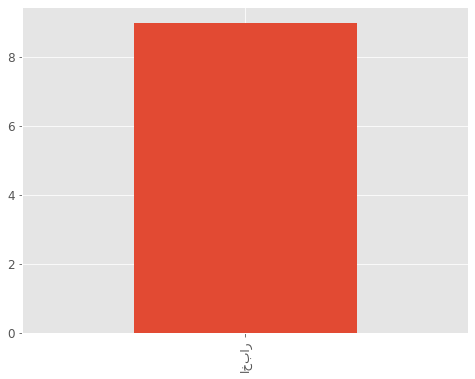

In [20]:
doc['article'].value_counts().plot.bar();

Importing NLTK corpus to remove stop words from the vector.





In [ ]:
from nltk.corpus import stopwords

Split the lines into sentences/words.

In [ ]:
doc['sentences'] = doc.paragraph.str.rstrip('.').str.split('[\.]\s+')
doc['words'] = doc.paragraph.str.strip().str.split('[\W_]+')

#This line is used to remove the English stop words
stop = stopwords.words('english')
doc['words'] = doc['words'].apply(lambda x: [item for item in x if item not in stop])
#doc.head()
doc

,article,paragraph,sentences,words
0,اخبار,دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه،...,[دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه...,"[دکتر, سعید, ستایشی, متولد, ۱۳۳۵, از, استان, ک..."
1,اخبار,برای آشنایی بیشتر با این دانشمند ارزشمند کرمان...,[برای آشنایی بیشتر با این دانشمند ارزشمند کرما...,"[برای, آشنایی, بیشتر, با, این, دانشمند, ارزشمن..."
2,اخبار,دکتر «سعید ستایشی» مایه ی فخر آسمان علمی کشور ...,[دکتر «سعید ستایشی» مایه ی فخر آسمان علمی کشور...,"[دکتر, سعید, ستایشی, مایه, ی, فخر, آسمان, علمی..."
3,اخبار,این جوان برتر کشور در عرصه ی علم و فناوری و عض...,[این جوان برتر کشور در عرصه ی علم و فناوری و ع...,"[این, جوان, برتر, کشور, در, عرصه, ی, علم, و, ف..."
4,اخبار,وی ادامه داد: ایشان یک فیزیک دان، مهندس و دکتر...,[وی ادامه داد: ایشان یک فیزیک دان، مهندس و دکت...,"[وی, ادامه, داد, ایشان, یک, فیزیک, دان, مهندس,..."
5,اخبار,ایشان دارای مدارک کارشناسی و کارشناسی ارشد فیز...,[ایشان دارای مدارک کارشناسی و کارشناسی ارشد فی...,"[ایشان, دارای, مدارک, کارشناسی, و, کارشناسی, ا..."
6,اخبار,روشنی بیان کرد: دکتر ستایشی نمونه ی بارز یک اس...,[روشنی بیان کرد: دکتر ستایشی نمونه ی بارز یک ا...,"[روشنی, بیان, کرد, دکتر, ستایشی, نمونه, ی, بار..."
7,اخبار,این عضو هیات علمی دانشگاه صنعتی کرمانشاه افزود...,[این عضو هیات علمی دانشگاه صنعتی کرمانشاه افزو...,"[این, عضو, هیات, علمی, دانشگاه, صنعتی, کرمانشا..."
8,اخبار,وی خاطرنشان کرد: امید دارم که تلفیق توان مدیری...,[وی خاطرنشان کرد: امید دارم که تلفیق توان مدیر...,"[وی, خاطرنشان, کرد, امید, دارم, که, تلفیق, توا..."




```
# This is formatted as code
```

Split the paragraph into sentences.

In [ ]:
rows = list()
for row in doc[['paragraph', 'sentences']].iterrows():
    r = row[1]
    for sentence in r.sentences:
        rows.append((r.paragraph, sentence))

sentences = pd.DataFrame(rows, columns=['paragraph', 'sentences'])
#sentences = sentences[sentences.sentences.str.len() > 0]
sentences.head()

,paragraph,sentences
0,دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه،...,دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه،...
1,برای آشنایی بیشتر با این دانشمند ارزشمند کرمان...,برای آشنایی بیشتر با این دانشمند ارزشمند کرمان...
2,دکتر «سعید ستایشی» مایه ی فخر آسمان علمی کشور ...,دکتر «سعید ستایشی» مایه ی فخر آسمان علمی کشور است
3,این جوان برتر کشور در عرصه ی علم و فناوری و عض...,این جوان برتر کشور در عرصه ی علم و فناوری و عض...
4,وی ادامه داد: ایشان یک فیزیک دان، مهندس و دکتر...,وی ادامه داد: ایشان یک فیزیک دان، مهندس و دکتر...


Split the paragraph into words.

In [ ]:
rows = list()
for row in doc[['paragraph', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.paragraph, word))

words = pd.DataFrame(rows, columns=['paragraph', 'words'])
#remove empty spaces and change words to lower case
words = words[words.words.str.len() > 0]
words['words'] = words.words.str.lower()
#words.head()
#words


Calculate word counts in the article.

In [ ]:
rows = list()
for row in doc[['article', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.article, word))

wordcount = pd.DataFrame(rows, columns=['article', 'words'])
wordcount['words'] = wordcount.words.str.lower()
wordcount.words = wordcount.words.str.replace('\d+', '')
wordcount.words = wordcount.words.str.replace(r'^the', '')
wordcount = wordcount[wordcount.words.str.len() > 2]  


counts = wordcount.groupby('article')\
    .words.value_counts()\
    .to_frame()\
    .rename(columns={'words':'n_w'})
#counts.head()
counts
#wordcount
#wordcount.words.tolist()
#counts.columns

n_w
article words         
اخبار   دکتر         7
        این          6
        ستایشی       5
        است          4
        ایشان        4
...                ...
        کرمانشاهی    1
        گردن         1
        گزینه        1
        گوید         1
        یازدهم       1

[130 rows x 1 columns]

Plot number frequency graph.

n_w
article words        
اخبار   دکتر        7
        این         6
        ستایشی      5
        است         4
        ایشان       4
        دانشگاه     4
        علمی        4
        کارشناسی    4
        ارشد        3
        دولت        3
        سعید        3
        صنعتی       3
        عضو         3
        علوم        3
        فیزیک       3
        مخابرات     3
        کرد         3
        کرمانشاه    3
        کشور        3
        استاد       2

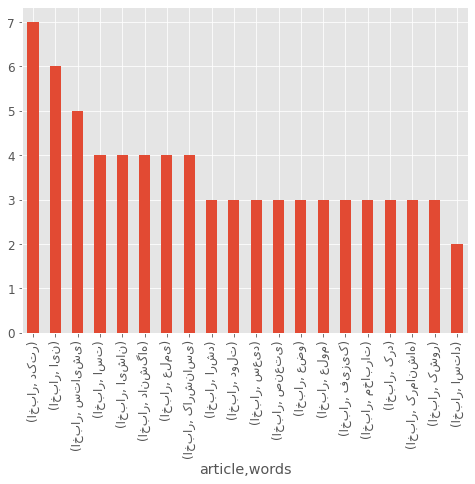

In [ ]:
def pretty_plot_top_n(series, top_n=20, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()


pretty_plot_top_n(counts['n_w'])


In [ ]:
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
word_sum


,n_d
article,
اخبار,198


In [ ]:
tf = counts.join(word_sum)

tf['tf'] = tf.n_w/tf.n_d

tf.head()
#tf

n_w  n_d        tf
article words                     
اخبار   دکتر      7  198  0.035354
        این       6  198  0.030303
        ستایشی    5  198  0.025253
        است       4  198  0.020202
        ایشان     4  198  0.020202

Plot top 20 words based on TF

tf
article words             
اخبار   دکتر      0.035354
        این       0.030303
        ستایشی    0.025253
        است       0.020202
        ایشان     0.020202
        دانشگاه   0.020202
        علمی      0.020202
        کارشناسی  0.020202
        ارشد      0.015152
        دولت      0.015152
        سعید      0.015152
        صنعتی     0.015152
        عضو       0.015152
        علوم      0.015152
        فیزیک     0.015152
        مخابرات   0.015152
        کرد       0.015152
        کرمانشاه  0.015152
        کشور      0.015152
        استاد     0.010101

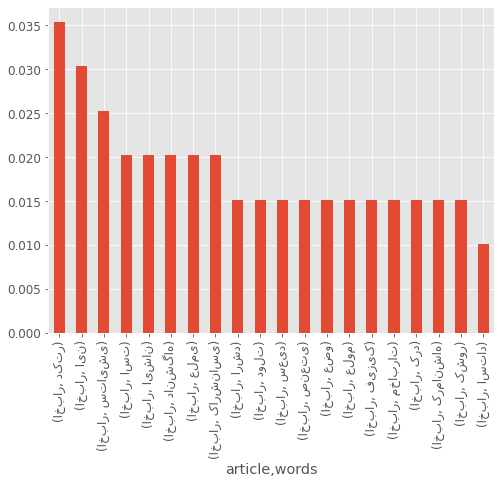

In [ ]:
pretty_plot_top_n(tf['tf'])

In [ ]:
c_d = wordcount.article.nunique()
c_d

1

In [ ]:
idf = wordcount.groupby('words')\
    .article\
    .nunique()\
    .to_frame()\
    .rename(columns={'article':'i_d'})\
    .sort_values('i_d')
idf.head()


,i_d
words,
آسمان,1
مطرح,1
مشاور,1
مدیریتی,1
مدیریت,1


In [ ]:
idf['idf'] = np.log(c_d/idf.i_d.values)

idf.head()
#idf

,i_d,idf
words,,
آسمان,1,0.0
مطرح,1,0.0
مشاور,1,0.0
مدیریتی,1,0.0
مدیریت,1,0.0


IDF values are all zeros because in this example, only 1 article is considered & all unique words appeared in the same article.  IDF values are 0 if it appears in all the documents.

In [ ]:
tf_idf = tf.join(idf)

tf_idf.head()
#tf_idf

n_w  n_d        tf  i_d  idf
article words                               
اخبار   دکتر      7  198  0.035354    1  0.0
        این       6  198  0.030303    1  0.0
        ستایشی    5  198  0.025253    1  0.0
        است       4  198  0.020202    1  0.0
        ایشان     4  198  0.020202    1  0.0

In [ ]:
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf
tf_idf.head()
#tf_idf

n_w  n_d        tf  i_d  idf  tf_idf
article words                                       
اخبار   دکتر      7  198  0.035354    1  0.0     0.0
        این       6  198  0.030303    1  0.0     0.0
        ستایشی    5  198  0.025253    1  0.0     0.0
        است       4  198  0.020202    1  0.0     0.0
        ایشان     4  198  0.020202    1  0.0     0.0


-------------------------------------------------
**Part 2: Using Hopfield Network to find the most important words**

In this part, the TF scores are treated as the Frequency Vector i.e. the input to Hopfield Network.

Frequency Matrix is constructed to be treated as Hopfield Network weights.

In [ ]:
freq_matrix = pd.DataFrame(np.outer(tf_idf["tf"], tf_idf["tf"]), tf_idf["tf"].index, tf_idf["tf"].index)
#freq_matrix.head()
freq_matrix

article               اخبار                      ...                              
words                  دکتر       این    ستایشی  ...     گزینه      گوید    یازدهم
article words                                    ...                              
اخبار   دکتر       0.001250  0.001071  0.000893  ...  0.000179  0.000179  0.000179
        این        0.001071  0.000918  0.000765  ...  0.000153  0.000153  0.000153
        ستایشی     0.000893  0.000765  0.000638  ...  0.000128  0.000128  0.000128
        است        0.000714  0.000612  0.000510  ...  0.000102  0.000102  0.000102
        ایشان      0.000714  0.000612  0.000510  ...  0.000102  0.000102  0.000102
...                     ...       ...       ...  ...       ...       ...       ...
        کرمانشاهی  0.000179  0.000153  0.000128  ...  0.000026  0.000026  0.000026
        گردن       0.000179  0.000153  0.000128  ...  0.000026  0.000026  0.000026
        گزینه      0.000179  0.000153  0.000128  ...  0.000026  0.000026  0.000026
        گوید       0.000179  0.000153  0.000128  ...  0.000026  0.000026  0.000026
        یازدهم     0.000179  0.000153  0.000128  ...  0.000026  0.000026  0.000026

[130 rows x 130 columns]

Finding the maximum of the frequency vector and matrix

In [ ]:
vector_max = tf_idf['tf'].max()
print(vector_max)
matrix_max = freq_matrix.max().max()
print(matrix_max)

0.03535353535353535
0.001249872461993674


Normalizing the frequency vector

In [ ]:
tf_idf['norm_freq'] = tf_idf.tf / vector_max

temp_df = tf_idf[['tf', 'norm_freq']]
#temp_df
temp_df.head(20)

#tf_idf.head()
#tf_idf

tf  norm_freq
article words                        
اخبار   دکتر      0.035354   1.000000
        این       0.030303   0.857143
        ستایشی    0.025253   0.714286
        است       0.020202   0.571429
        ایشان     0.020202   0.571429
        دانشگاه   0.020202   0.571429
        علمی      0.020202   0.571429
        کارشناسی  0.020202   0.571429
        ارشد      0.015152   0.428571
        دولت      0.015152   0.428571
        سعید      0.015152   0.428571
        صنعتی     0.015152   0.428571
        عضو       0.015152   0.428571
        علوم      0.015152   0.428571
        فیزیک     0.015152   0.428571
        مخابرات   0.015152   0.428571
        کرد       0.015152   0.428571
        کرمانشاه  0.015152   0.428571
        کشور      0.015152   0.428571
        استاد     0.010101   0.285714

Normalizing the frequency matrix

In [ ]:
freq_matrix_norm = freq_matrix.div(matrix_max)
freq_matrix_norm

article               اخبار                      ...                              
words                  دکتر       این    ستایشی  ...     گزینه      گوید    یازدهم
article words                                    ...                              
اخبار   دکتر       1.000000  0.857143  0.714286  ...  0.142857  0.142857  0.142857
        این        0.857143  0.734694  0.612245  ...  0.122449  0.122449  0.122449
        ستایشی     0.714286  0.612245  0.510204  ...  0.102041  0.102041  0.102041
        است        0.571429  0.489796  0.408163  ...  0.081633  0.081633  0.081633
        ایشان      0.571429  0.489796  0.408163  ...  0.081633  0.081633  0.081633
...                     ...       ...       ...  ...       ...       ...       ...
        کرمانشاهی  0.142857  0.122449  0.102041  ...  0.020408  0.020408  0.020408
        گردن       0.142857  0.122449  0.102041  ...  0.020408  0.020408  0.020408
        گزینه      0.142857  0.122449  0.102041  ...  0.020408  0.020408  0.020408
        گوید       0.142857  0.122449  0.102041  ...  0.020408  0.020408  0.020408
        یازدهم     0.142857  0.122449  0.102041  ...  0.020408  0.020408  0.020408

[130 rows x 130 columns]

Force the matrix diagonal to be zero to ignore the diagonal.  
This is necessary because the output of a neuron in Hopfield Network is connected to all other neurons except for itself.

In [ ]:
np.fill_diagonal(freq_matrix_norm.values, 0)
freq_matrix_norm

article               اخبار                      ...                              
words                  دکتر       این    ستایشی  ...     گزینه      گوید    یازدهم
article words                                    ...                              
اخبار   دکتر       0.000000  0.857143  0.714286  ...  0.142857  0.142857  0.142857
        این        0.857143  0.000000  0.612245  ...  0.122449  0.122449  0.122449
        ستایشی     0.714286  0.612245  0.000000  ...  0.102041  0.102041  0.102041
        است        0.571429  0.489796  0.408163  ...  0.081633  0.081633  0.081633
        ایشان      0.571429  0.489796  0.408163  ...  0.081633  0.081633  0.081633
...                     ...       ...       ...  ...       ...       ...       ...
        کرمانشاهی  0.142857  0.122449  0.102041  ...  0.020408  0.020408  0.020408
        گردن       0.142857  0.122449  0.102041  ...  0.020408  0.020408  0.020408
        گزینه      0.142857  0.122449  0.102041  ...  0.000000  0.020408  0.020408
        گوید       0.142857  0.122449  0.102041  ...  0.020408  0.000000  0.020408
        یازدهم     0.142857  0.122449  0.102041  ...  0.020408  0.020408  0.000000

[130 rows x 130 columns]

Manually testing the output based on Hopfield neural network formula where <font color=blue>*freq_matrix_norm*</font> is the <font color=red>*W*</font> & <font color=blue>*tf_idf["norm_freq"]*</font> is the <font color=red>vector of frequency</font> which is normalized.


After 15 iteration, it is shown that the word <font color=green>***kipchoge***</font> and <font color=green>***marathon***</font> is the the most important word. It is highly that it is accurate because the article was about the performance of Eliud Kipchoge running a marathon.

Disclaimer:  This part can be totally commented out but kept as a reference with the actual algorithm implemented later.

In [ ]:
#define sigmoid function
#currently just a placeholder because tanh activation function is selected instead
def sigmoid(x):
    beta = 1
    return 1 / (1 + np.exp(-x * beta))


tf_idf["hopfield_value"] = np.tanh(freq_matrix_norm @ tf_idf["norm_freq"])
temp = np.tanh(freq_matrix_norm @ tf_idf["hopfield_value"])
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
#temp
#temp
#temp.head()
temp.head(20)

article  words   
اخبار    دکتر        1.0
         این         1.0
         ستایشی      1.0
         است         1.0
         ایشان       1.0
         دانشگاه     1.0
         علمی        1.0
         کارشناسی    1.0
         ارشد        1.0
         دولت        1.0
         سعید        1.0
         صنعتی       1.0
         عضو         1.0
         علوم        1.0
         فیزیک       1.0
         مخابرات     1.0
         کرد         1.0
         کرمانشاه    1.0
         کشور        1.0
         استاد       1.0
dtype: float64

**Algorithm for Hopfield Neural Network**

Hopfield Loop exited at Iteration 11


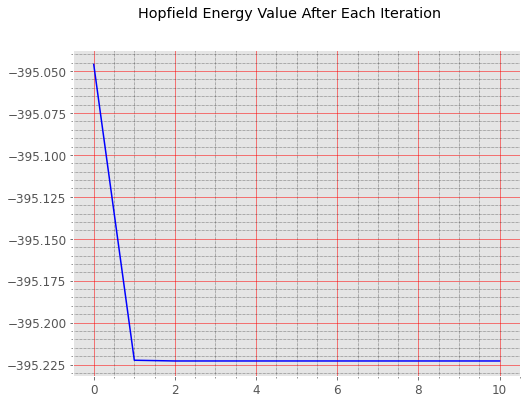

In [ ]:
#safe limit
itr = 0
zero_itr = 0
max_itr = 5    #maximum iteration where Delta Energy is 0
char_list = []
delta_energy = 0
threshold = 0
energy = 0
init_energy = 0

tf_idf["hopfield_value"] = np.tanh(freq_matrix_norm @ tf_idf["norm_freq"])

while (delta_energy < 0.0001):
    itr = itr + 1
    #Calculation of output vector from Hopfield Network
    #y = activation_function(sum(W * x))
    tf_idf["hopfield_value"] = np.tanh(freq_matrix_norm @ tf_idf["hopfield_value"])
    
    #Calculation of Hopfield Energy Function and its Delta
    #E = [-1/2 * sum(Wij * xi * xj)] + [sum(threshold*xi)]
    energy = (-0.5 * tf_idf["hopfield_value"] @ freq_matrix_norm @ tf_idf["hopfield_value"]) \
              + (np.sum(threshold * tf_idf["hopfield_value"]))
    #Append to list for characterization
    char_list.append(energy)
    #Find Delta for Energy
    delta_energy = energy - init_energy
    #print ('Energy = {}'.format(energy))
    #print ('Init_Energy = {}'.format(init_energy))
    #print ('Delta_Energy = {}'.format(delta_energy))
    #print ()    
    init_energy = energy     #Setting the current energy to be previous energy in next iteration
    
    #break the loop if Delta Energy reached zero after a certain iteration
    if (delta_energy == 0):
        zero_itr = zero_itr + 1
        if (zero_itr == max_itr):
            print("Hopfield Loop exited at Iteration {}".format(itr))
            break


big_grid = np.arange(0,itr)
plt.plot(big_grid,char_list, color ='blue')
plt.suptitle('Hopfield Energy Value After Each Iteration')
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.minorticks_on()
plt.rcParams['figure.figsize'] = [13, 6]
plt.show()
#tf_idf.head()
#tf_idf
#final_hopfield_output = tf_idf["hopfield_value"]

In [ ]:
final_output_vector = tf_idf["hopfield_value"]
final_output_vector.head(10)
#final_output_vector.head()
#final_output_vector
#tf_idf

article  words   
اخبار    دکتر        1.0
         این         1.0
         ستایشی      1.0
         است         1.0
         ایشان       1.0
         دانشگاه     1.0
         علمی        1.0
         کارشناسی    1.0
         ارشد        1.0
         دولت        1.0
Name: hopfield_value, dtype: float64

Once again, it is shown that the words <font color=green>***kipchoge***</font> and <font color=green>***marathon***</font> are the the most important word. It is highly likely that it is accurate because the article was about the performance of Eliud Kipchoge running a marathon.


-------------------------------------------------
**Part 3: Article Summary**

New DataFrame is created and word index, starting & stopping position of sentences are calculated.

In [ ]:
txt_smr_sentences = pd.DataFrame({'sentences': sentences.sentences})
txt_smr_sentences['words'] = txt_smr_sentences.sentences.str.strip().str.split('[\W_]+')

rows = list()
for row in txt_smr_sentences[['sentences', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.sentences, word))

txt_smr_sentences = pd.DataFrame(rows, columns=['sentences', 'words'])
#remove empty spaces and change words to lower case
txt_smr_sentences['words'].replace('', np.nan, inplace=True)
txt_smr_sentences.dropna(subset=['words'], inplace=True)
txt_smr_sentences.reset_index(drop=True, inplace=True)
txt_smr_sentences['words'] = txt_smr_sentences.words.str.lower()

##Initialize 3 new columns
# w_ind = New word index
# s_strt = Starting index of a sentence
# s_stp = Stopping index of a sentence
# w_scr = Hopfield Value for words
txt_smr_sentences['w_ind'] = txt_smr_sentences.index + 1
txt_smr_sentences['s_strt'] = 0
txt_smr_sentences['s_stp'] = 0
txt_smr_sentences['w_scr'] = 0


#Iterate through the rows to check if the current sentence is equal to
#previous sentence.  If not equal, determine the "start" & "stop"
start = 0
stop = 0
prvs_string = ""
for i in txt_smr_sentences.index:
    #print (i)
    if (i == 0):
        start = 1
        txt_smr_sentences.iloc[i,3] = 1
        prvs_string = txt_smr_sentences.iloc[i,0]
    else:
        if (txt_smr_sentences.iloc[i,0] != prvs_string):
            stop = txt_smr_sentences.iloc[i-1,2]
            txt_smr_sentences.iloc[i-(stop-start)-1:i,4] = stop
            start = txt_smr_sentences.iloc[i,2]
            txt_smr_sentences.iloc[i,3] = start      
            prvs_string = txt_smr_sentences.iloc[i,0]
        else:
            txt_smr_sentences.iloc[i,3] = start
    if (i == len(txt_smr_sentences.index)-1):
        last_ind = txt_smr_sentences.w_ind.max()
        txt_smr_sentences.iloc[i-(last_ind-start):i+1,4] = last_ind

#New Column for length of sentence
txt_smr_sentences['length'] = txt_smr_sentences['s_stp'] - txt_smr_sentences['s_strt'] + 1

#Rearrange the Columns
txt_smr_sentences = txt_smr_sentences[['sentences', 's_strt', 's_stp', 'length', 'words', 'w_ind', 'w_scr']]

txt_smr_sentences.head(100)
#txt_smr_sentences

,sentences,s_strt,s_stp,length,words,w_ind,w_scr
0,دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه،...,1,39,39,دکتر,1,0
1,دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه،...,1,39,39,سعید,2,0
2,دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه،...,1,39,39,ستایشی,3,0
3,دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه،...,1,39,39,متولد,4,0
4,دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه،...,1,39,39,۱۳۳۵,5,0
...,...,...,...,...,...,...,...
95,این جوان برتر کشور در عرصه ی علم و فناوری و عض...,80,118,39,کرمانشاه,96,0
96,این جوان برتر کشور در عرصه ی علم و فناوری و عض...,80,118,39,اظهار,97,0
97,این جوان برتر کشور در عرصه ی علم و فناوری و عض...,80,118,39,کرد,98,0
98,این جوان برتر کشور در عرصه ی علم و فناوری و عض...,80,118,39,با,99,0


Check if word has Hopfield Score value, and update *txt_smr_sentences*

In [ ]:
for index, value in final_output_vector.items():
    for i in txt_smr_sentences.index:
        if(index[1] == txt_smr_sentences.iloc[i,4]):
            txt_smr_sentences.iloc[i,6] = value

#New Column for placeholder of sentences score
txt_smr_sentences['s_scr'] = txt_smr_sentences.w_scr

txt_smr_sentences.head(100)

,sentences,s_strt,s_stp,length,words,w_ind,w_scr,s_scr
0,دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه،...,1,39,39,دکتر,1,1.000000,1.000000
1,دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه،...,1,39,39,سعید,2,1.000000,1.000000
2,دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه،...,1,39,39,ستایشی,3,1.000000,1.000000
3,دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه،...,1,39,39,متولد,4,0.999355,0.999355
4,دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه،...,1,39,39,۱۳۳۵,5,0.000000,0.000000
...,...,...,...,...,...,...,...,...
95,این جوان برتر کشور در عرصه ی علم و فناوری و عض...,80,118,39,کرمانشاه,96,1.000000,1.000000
96,این جوان برتر کشور در عرصه ی علم و فناوری و عض...,80,118,39,اظهار,97,0.999355,0.999355
97,این جوان برتر کشور در عرصه ی علم و فناوری و عض...,80,118,39,کرد,98,1.000000,1.000000
98,این جوان برتر کشور در عرصه ی علم و فناوری و عض...,80,118,39,با,99,0.000000,0.000000


In [ ]:
# three_sigma = 3 * math.sqrt((tf_idf.loc[:,"hopfield_value"].var()))
# three_sigma
# tf_idf["hopfield_value"]

Merge the DataFrame into a new one that sum the score of the words in each sentences and group them by sentences.

The sentences are also ranked based on the highest scores.

In [ ]:
aggregation_functions = {'s_strt': 'first', \
                         's_stp': 'first', \
                         'length': 'first', \
                         's_scr': 'sum'}
tss_new = txt_smr_sentences.groupby(txt_smr_sentences['sentences']).aggregate(aggregation_functions)\
            .sort_values(by='s_scr', ascending=False).reset_index()
tss_new

,sentences,s_strt,s_stp,length,s_scr
0,این عضو هیات علمی دانشگاه صنعتی کرمانشاه افزود...,194,234,41,30.991607
1,دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه،...,1,39,39,30.990963
2,این جوان برتر کشور در عرصه ی علم و فناوری و عض...,80,118,39,29.990317
3,برای آشنایی بیشتر با این دانشمند ارزشمند کرمان...,40,69,30,23.989672
4,روشنی بیان کرد: دکتر ستایشی نمونه ی بارز یک اس...,163,193,31,22.992898
5,ایشان دارای مدارک کارشناسی و کارشناسی ارشد فیز...,137,162,26,20.996126
6,وی خاطرنشان کرد: امید دارم که تلفیق توان مدیری...,235,255,21,15.993544
7,وی ادامه داد: ایشان یک فیزیک دان، مهندس و دکتر...,119,136,18,12.995481
8,دکتر «سعید ستایشی» مایه ی فخر آسمان علمی کشور است,70,79,10,8.998064


Finding 10% of the whole article and print them as a summary

In [ ]:
import math

max_word = math.floor(0.1 * tss_new['s_stp'].max())
print("Max word amount for summary: {}\n".format(max_word))

summary = tss_new.loc[tss_new['s_strt'] == 1, 'sentences'].iloc[0] + ". " ##Consider the Title of the Article
length_printed = 0

for i in tss_new.index:
    if (length_printed <= max_word):
        summary +=  tss_new.iloc[i,0] + ". "
        length_printed += tss_new.iloc[i,3]  ##Consider the sentence where max_word appear in the middle
    else:
        break

print(summary)

Max word amount for summary: 25

دکتر سعید ستایشی متولد ۱۳۳۵ از استان کرمانشاه، عضو هیئت علمی و استاد دانشکده فیزیک دانشگاه پلی تکنیک است که پیش از این معاون مخابرات دولت جنگ و مشاور وزیر علوم در دولت پیشین را عهده دار بوده است. این عضو هیات علمی دانشگاه صنعتی کرمانشاه افزود: دکتر ستایشی سابقه ی بسیار درخشانی نیز در دوران معاونت خود در وزارت مخابرات داشته اند و بعد مدیریت ایشان را بارها در جلسات دفاع و امثالهم با تمام وجود حس کرده ام. 


In [ ]:
!jupyter nbconvert --to html ./ArticleSummarization.ipynb

[NbConvertApp] WARNING | pattern u'./ArticleSummarization.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplac